In [121]:
#Carga de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

2. Agregar el archivo: diamonds.csv

In [122]:
#Carga de base de datos 
df= pd.read_csv("diamonds.csv")
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


3. Aplicar las acciones de preprocesamiento pertinentes “Nulos y Outliers”

In [123]:
#Identificación de valores nulos
valornulls=df.isnull().sum()
valornulls

carat      3
cut        0
color      0
clarity    0
depth      2
table      3
price      3
x          1
y          1
z          4
dtype: int64

In [124]:
#media 
df["carat"]=df["carat"].fillna(round(df["carat"].mean(),2))
#mediana
df["depth"]=df["depth"].fillna(round(df["depth"].median(),1))
#mediana
df["table"]=df["table"].fillna(round(df["table"].median(),0))
#mediana
df["price"]=df["price"].fillna(round(df["price"].median(),2))
#media
df["x"]=df["x"].fillna(round(df["x"].median(),2))
#media
df["y"]=df["y"].fillna(round(df["y"].mean(),2))
#media
df["z"]=df["z"].fillna(round(df["z"].mean(),2))

In [125]:
#Identificación de valores nulos después de la sustitución
valornulls2=df.isnull().sum()
valornulls2

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<Figure size 1080x576 with 0 Axes>

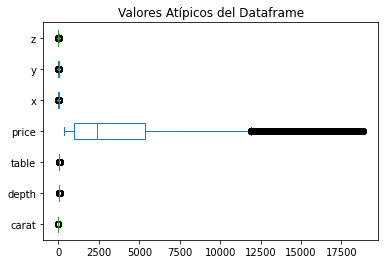

In [126]:
#Tratado de Outliers
fig = plt.figure(figsize =(15, 8))
df.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

In [127]:
#Desviación estandar
#Primera variable: carat
carat=df["carat"]
limitecarasuperior= carat.mean() + 3*carat.std()
limitecarainferior= carat.mean() - 3*carat.std()
print("Limite superior permitido", limitecarasuperior)
print("Limite inferior permitido", limitecarainferior)

Limite superior permitido 2.2199529087395717
Limite inferior permitido -0.6240897274270025


In [128]:
#Sustitución: carat.
df2=df[(carat<=limitecarasuperior)&(carat>=limitecarainferior)] 
df2["carat"]=df2["carat"].fillna(round(df["carat"].mean(),2))

/var/folders/nc/68rf91wx2pjbt67gbj6chn7h0000gn/T/ipykernel_4041/571952964.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["carat"]=df2["carat"].fillna(round(df["carat"].mean(),2))


In [129]:
#Desviación estandar
#Variable: depth
depth=df["depth"]
limitedepthsuperior= depth.mean() + 3*depth.std()
limitedepthinferior= depth.mean() - 3*depth.std()
print("Limite superior permitido", limitedepthsuperior)
print("Limite inferior permitido", limitedepthinferior)

Limite superior permitido 66.04722027350738
Limite inferior permitido 57.451574683852655


In [130]:
#Sustitución:depth
df2=df[(depth<=limitedepthsuperior)&(depth>=limitedepthinferior)] 
df2["depth"]=df2["depth"].fillna(round(df["depth"].median(),1))

/var/folders/nc/68rf91wx2pjbt67gbj6chn7h0000gn/T/ipykernel_4041/3001063470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["depth"]=df2["depth"].fillna(round(df["depth"].median(),1))


In [131]:
#Desviación estandar
#Variable: table
table=df["table"]
limitetablesuperior= table.mean() + 3*table.std()
limitetableinferior= table.mean() - 3*table.std()
print("Limite superior permitido", limitetablesuperior)
print("Limite inferior permitido", limitetableinferior)

Limite superior permitido 64.16054017079666
Limite inferior permitido 50.753938880000526


In [132]:
#Sustitución:table
df2=df[(table<=limitetablesuperior)&(table>=limitetableinferior)] 
df2["table"]=df2["table"].fillna(round(df["table"].median(),0))

/var/folders/nc/68rf91wx2pjbt67gbj6chn7h0000gn/T/ipykernel_4041/2907979116.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["table"]=df2["table"].fillna(round(df["table"].median(),0))


In [133]:
#Desviación estandar
#Variable: price
price=df["price"]
limitepricesuperior= price.mean() + 3*price.std()
limitepriceinferior= price.mean() - 3*price.std()
print("Limite superior permitido", limitepricesuperior)
print("Limite inferior permitido", limitepriceinferior)

Limite superior permitido 15901.11828474277
Limite inferior permitido -8035.52625656331


In [134]:
df2=df[(price<=limitepricesuperior)&(price>=limitepriceinferior)] 
df2["price"]=df2["price"].fillna(round(df["price"].median(),2))


/var/folders/nc/68rf91wx2pjbt67gbj6chn7h0000gn/T/ipykernel_4041/764899253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["price"]=df2["price"].fillna(round(df["price"].median(),2))


In [136]:
#Desviación estandar
#Variable: x
x=df["x"]
limitexsuperior= x.mean() + 3*x.std()
limitexinferior= x.mean() - 3*x.std()
print("Limite superior permitido", limitexsuperior)
print("Limite inferior permitido", limitexinferior)

Limite superior permitido 9.096441194396238
Limite inferior permitido 2.3658939928488483


In [137]:
#Sustitución:x
df2=df[(x<=limitexsuperior)&(x>=limitexinferior)] 
df2["x"]=df2["x"].fillna(round(df["x"].median(),2))

/var/folders/nc/68rf91wx2pjbt67gbj6chn7h0000gn/T/ipykernel_4041/140211074.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["x"]=df2["x"].fillna(round(df["x"].median(),2))


In [138]:
#Desviación estandar
#Variable: y
y=df["y"]
limiteysuperior= y.mean() + 3*y.std()
limiteyinferior= y.mean() - 3*y.std()
print("Limite superior permitido", limiteysuperior)
print("Limite inferior permitido", limiteyinferior)

Limite superior permitido 9.160929205428292
Limite inferior permitido 2.3081212209714113


In [139]:
#Sustitución:y
df2=df[(y<=limiteysuperior)&(x>=limiteyinferior)] 
df2["y"]=df2["y"].fillna(round(df["y"].mean(),2))

/var/folders/nc/68rf91wx2pjbt67gbj6chn7h0000gn/T/ipykernel_4041/733239874.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["y"]=df2["y"].fillna(round(df["y"].mean(),2))


In [140]:
#Desviación estandar
#Variable: z
z=df["z"]
limitezsuperior= z.mean() + 3*z.std()
limitezinferior= z.mean() - 3*z.std()
print("Limite superior permitido", limitezsuperior)
print("Limite inferior permitido", limitezinferior)

Limite superior permitido 5.6557964934019225
Limite inferior permitido 1.4216714339247365


In [141]:
#Sustitución:z
df2=df[(z<=limitezsuperior)&(z>=limitezinferior)] 
df2["z"]=df2["z"].fillna(round(df["z"].mean(),2))

/var/folders/nc/68rf91wx2pjbt67gbj6chn7h0000gn/T/ipykernel_4041/3631844549.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["z"]=df2["z"].fillna(round(df["z"].mean(),2))


In [142]:
#Guardar base de datos limpia en un nuevo .csv
df2.to_csv("diamonds_clean.csv")

5. Correlación entre variables

In [143]:
#DEFINIMOS LA BASE DE DATOS 
dataframe= pd.read_csv("diamonds_clean.csv")

In [144]:
#Se define model como la  de regresión lineal
from sklearn.linear_model import LinearRegression
model1=LinearRegression()

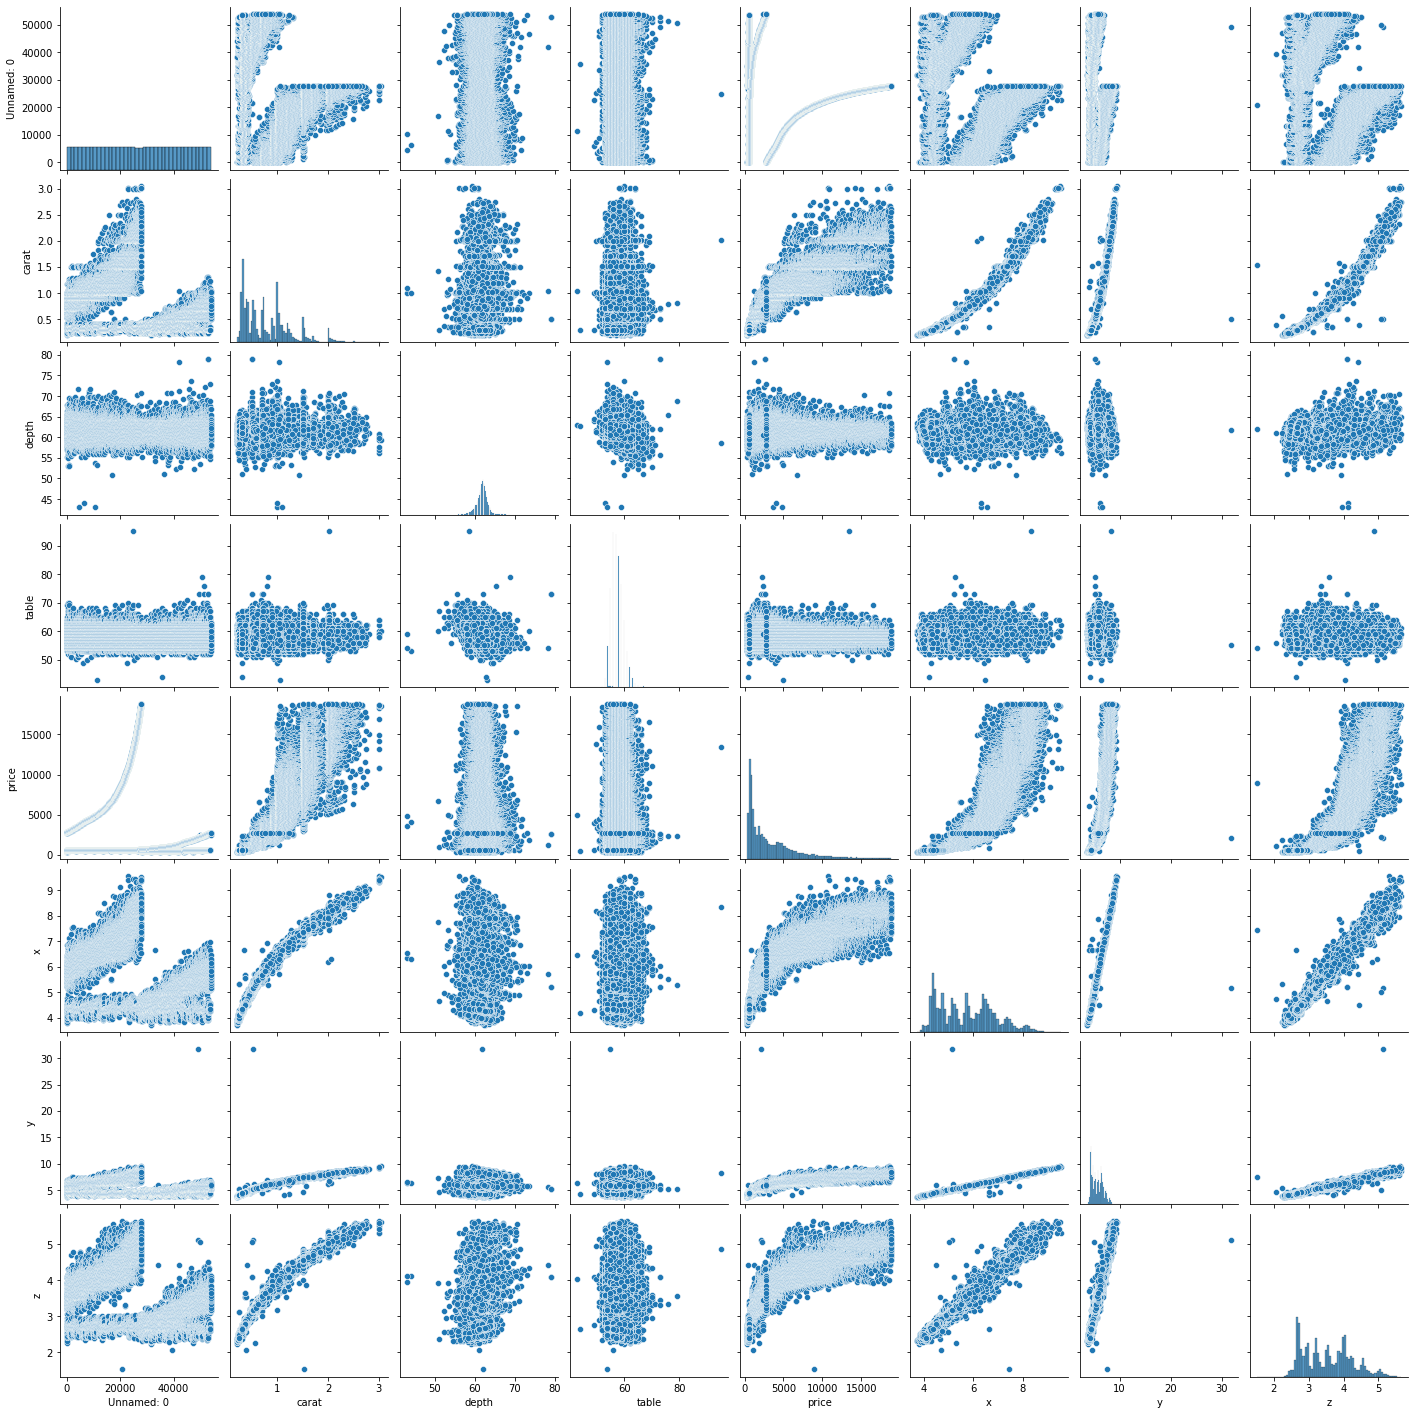

In [145]:
#GRAFICA DE DISPERSIONES ENTRE VARIABLES
sns.pairplot(dataframe)

In [146]:
Dep=dataframe['price']

In [147]:
#A) PRICE - CARAT

Indepa=dataframe[['carat']]
model1.fit(X=Indepa, y=Dep)

#Coeficiente de determinación A)
coef_Detera = model1.score(X=Indepa, y=Dep)
coef_Detera

0.8527448841048546

In [148]:
#Correlación 1
coef_Correlacion1=np.sqrt(coef_Detera)
coef_Correlacion1

0.9234418682867128

<AxesSubplot:xlabel='carat', ylabel='price'>

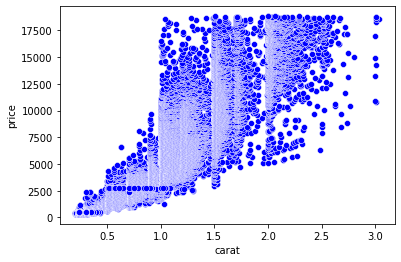

In [149]:
#Diagrama de dispersión A
from turtle import color
sns.scatterplot(x='carat', y='price', color="blue", data=dataframe)

In [150]:
#B) PRICE - DEPTH

Indepb=dataframe[['depth']]
modelb=LinearRegression()
modelb.fit(X=Indepb, y=Dep)

#Coeficiente de determinación 2
coef_Deterb = modelb.score(X=Indepb, y=Dep)
coef_Deterb

0.00017158417686213845

In [151]:
#Correlación 2
coef_Correlb=np.sqrt(coef_Deterb)
coef_Correlb

0.01309901434697048

<AxesSubplot:xlabel='depth', ylabel='price'>

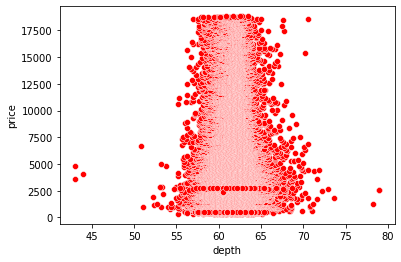

In [152]:
#Diagrama de dispersión B
from turtle import color
sns.scatterplot(x='depth', y='price', color="red", data=dataframe)

In [153]:
#C) PRICE - TABLE

Indepc=dataframe[['table']]
modelc=LinearRegression()
modelc.fit(X=Indepc, y=Dep)

#Coeficiente de determinación 3
coef_Deterc = modelc.score(X=Indepc, y=Dep)
coef_Deterc

0.016185396463762047

In [154]:
#Correlación 3
coef_Correlc=np.sqrt(coef_Deterc)
coef_Correlc

0.12722183957073585

<AxesSubplot:xlabel='table', ylabel='price'>

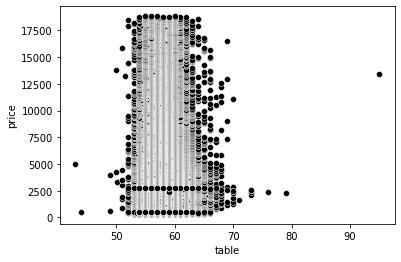

In [155]:
#Diagrama de dispersión C
from turtle import color
sns.scatterplot(x='table', y='price', color="black", data=dataframe)

In [156]:
#D) PRICE - CARAT - DEPTH

modeld=smf.ols(formula="price~carat+depth", data=df).fit()
modeld.params

Intercept    4045.763423
carat        7765.130034
depth        -102.171199
dtype: float64

In [157]:
modeld.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 1.536e+05
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:39:37   Log-Likelihood:            -4.7249e+05
No. Observations:               53940   AIC:                         9.450e+05
Df Residuals:                   53937   BIC:                         9.450e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4045.7634    286.225     14.135      0.000    3484.760    4606.767
carat       7765.1300     14.010    554.243      0.000    7737.670    7792.590
depth       -102.1712      4.636    -22.041      0.000    -111.257     -93.085
==============================================================================
Omnibus:                    14148.641   Durbin-Watson:                   0.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           148173.559
Skew:                           0.962   Prob(JB):                         0.00
Kurtosis:                      10.888   Cond. No.                     2.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [158]:
#Calculamos el coeficiente de correlación R 
coef_Correld= np.sqrt(0.851)
coef_Correld

0.9224966124599049

In [159]:
#E) PRICE - CARAT - TABLE
modele=smf.ols(formula="price~carat+table", data=df).fit()
modele.params

Intercept    1963.146331
carat        7820.046967
table         -74.319840
dtype: float64

In [160]:
modele.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 1.540e+05
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:40:05   Log-Likelihood:            -4.7243e+05
No. Observations:               53940   AIC:                         9.449e+05
Df Residuals:                   53937   BIC:                         9.449e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1963.1463    171.826     11.425      0.000    1626.365    2299.927
carat       7820.0470     14.226    549.706      0.000    7792.164    7847.930
table        -74.3198      3.018    -24.627      0.000     -80.235     -68.405
==============================================================================
Omnibus:                    13939.648   Durbin-Watson:                   1.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           159338.204
Skew:                           0.918   Prob(JB):                         0.00
Kurtosis:                      11.217   Cond. No.                     1.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [161]:
#Calculamos el coeficiente de correlación R 
coef_Correle= np.sqrt(0.851)
coef_Correle

0.9224966124599049

In [162]:
#F) PRICE - DEPTH - TABLE
modelf=smf.ols(formula="price~depth+table", data=df).fit()
modelf.params

Intercept   -15086.606756
depth           82.271591
table          242.600963
dtype: float64

In [163]:
modelf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     465.3
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          4.42e-201
Time:                        22:40:12   Log-Likelihood:            -5.2331e+05
No. Observations:               53940   AIC:                         1.047e+06
Df Residuals:                   53937   BIC:                         1.047e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.509e+04   1004.733    -15.016      0.000   -1.71e+04   -1.31e+04
depth         82.2716     12.445      6.611      0.000      57.879     106.665
table        242.6010      7.979     30.404      0.000     226.961     258.241
==============================================================================
Omnibus:                    15208.104   Durbin-Watson:                   0.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34865.541
Skew:                           1.622   Prob(JB):                         0.00
Kurtosis:                       5.234   Cond. No.                     4.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [164]:
#Calculamos el coeficiente de correlación R 
coef_Correlf= np.sqrt(0.017)
coef_Correlf

0.130384048104053

In [165]:
#G) PRICE - TAMAÑO (x,y,z)
modelg=smf.ols(formula="price~x+y+z", data=df).fit()
modelg.params

Intercept   -14113.091142
x             2789.799527
y              219.177736
z              226.125578
dtype: float64

In [166]:
modelg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                 6.470e+04
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:40:17   Log-Likelihood:            -4.8263e+05
No. Observations:               53940   AIC:                         9.653e+05
Df Residuals:                   53936   BIC:                         9.653e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.411e+04     41.764   -337.928      0.000   -1.42e+04    -1.4e+04
x           2789.7995     40.978     68.081      0.000    2709.483    2870.116
y            219.1777     31.563      6.944      0.000     157.313     281.042
z            226.1256     47.561      4.754      0.000     132.907     319.345
==============================================================================
Omnibus:                    18879.196   Durbin-Watson:                   0.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           144516.999
Skew:                           1.481   Prob(JB):                         0.00
Kurtosis:                      10.452   Cond. No.                         65.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
#Calculamos el coeficiente de correlación R 
coef_Correlg= np.sqrt(0.783)
coef_Correlg

0.8848728722251575

In [168]:
#H) PRICE - TAMAÑO - CARAT - DEPTH
modelh=smf.ols(formula="price~x+y+z+carat+depth", data=df).fit()
modelh.params

Intercept    12180.008661
x            -1367.038839
y               97.616482
z               63.369607
carat        10610.504414
depth         -156.486919
dtype: float64

In [169]:
modelh.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 6.428e+04
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:40:21   Log-Likelihood:            -4.7145e+05
No. Observations:               53940   AIC:                         9.429e+05
Df Residuals:                   53934   BIC:                         9.430e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.218e+04    367.612     33.133      0.000    1.15e+04    1.29e+04
x          -1367.0388     43.465    -31.451      0.000   -1452.231   -1281.846
y             97.6165     25.767      3.788      0.000      47.112     148.121
z             63.3696     44.736      1.417      0.157     -24.314     151.053
carat       1.061e+04     63.796    166.319      0.000    1.05e+04    1.07e+04
depth       -156.4869      5.377    -29.105      0.000    -167.025    -145.949
==============================================================================
Omnibus:                    14213.587   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           353688.138
Skew:                           0.706   Prob(JB):                         0.00
Kurtosis:                      15.465   Cond. No.                     3.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [170]:
coef_Correlh= np.sqrt(0.856)
coef_Correlh

0.9252026804976302

In [171]:
#I) PRICE - TAMAÑO - PRICE - DEPTH - TABLE
modeli=smf.ols(formula="price~x+y+z+carat+depth+table", data=df).fit()
modeli.params

Intercept    20836.279895
x            -1313.198753
y               66.355072
z               40.977362
carat        10681.450081
depth         -203.043361
table         -102.478049
dtype: float64

In [172]:
modeli.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 5.485e+04
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:40:26   Log-Likelihood:            -4.7091e+05
No. Observations:               53940   AIC:                         9.418e+05
Df Residuals:                   53933   BIC:                         9.419e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.084e+04    447.573     46.554      0.000       2e+04    2.17e+04
x          -1313.1988     43.058    -30.498      0.000   -1397.593   -1228.804
y             66.3551     25.525      2.600      0.009      16.325     116.385
z             40.9774     44.291      0.925      0.355     -45.833     127.788
carat       1.068e+04     63.190    169.037      0.000    1.06e+04    1.08e+04
depth       -203.0434      5.504    -36.890      0.000    -213.831    -192.256
table       -102.4780      3.085    -33.222      0.000    -108.524     -96.432
==============================================================================
Omnibus:                    14098.036   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           372768.852
Skew:                           0.676   Prob(JB):                         0.00
Kurtosis:                      15.808   Cond. No.                     5.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [173]:
#Calculamos el coeficiente de correlación R 
coef_Correli= np.sqrt(0.859)
coef_Correli

0.9268225288586807

In [174]:
#Coeficientes de correlación entre las diferentes variables
Corr_Factors=df.corr()
Corr_Factors

,carat,depth,table,price,x,y,z
carat,1.000000,0.028228,0.181635,0.921582,0.975080,0.951712,0.953363
depth,0.028228,1.000000,-0.295777,-0.010646,-0.025280,-0.029337,0.094925
table,0.181635,-0.295777,1.000000,0.127139,0.195350,0.183776,0.150955
price,0.921582,-0.010646,0.127139,1.000000,0.884431,0.865421,0.861233
x,0.975080,-0.025280,0.195350,0.884431,1.000000,0.974700,0.970753
y,0.951712,-0.029337,0.183776,0.865421,0.974700,1.000000,0.951990
z,0.953363,0.094925,0.150955,0.861233,0.970753,0.951990,1.000000


In [175]:
Corr_Factorsx= abs(Corr_Factors)
Corr_Factorsx

,carat,depth,table,price,x,y,z
carat,1.000000,0.028228,0.181635,0.921582,0.975080,0.951712,0.953363
depth,0.028228,1.000000,0.295777,0.010646,0.025280,0.029337,0.094925
table,0.181635,0.295777,1.000000,0.127139,0.195350,0.183776,0.150955
price,0.921582,0.010646,0.127139,1.000000,0.884431,0.865421,0.861233
x,0.975080,0.025280,0.195350,0.884431,1.000000,0.974700,0.970753
y,0.951712,0.029337,0.183776,0.865421,0.974700,1.000000,0.951990
z,0.953363,0.094925,0.150955,0.861233,0.970753,0.951990,1.000000


<AxesSubplot:>

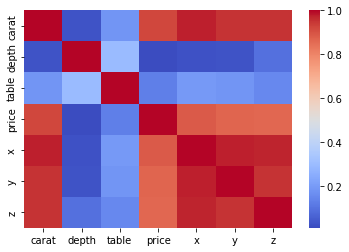

In [176]:
#MAPA DE CALOR 
HeatMap1= sns.heatmap(Corr_Factorsx, cmap = 'coolwarm')  
HeatMap1

<AxesSubplot:>

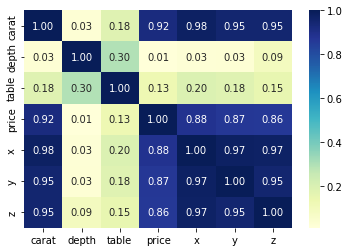

In [177]:
HeatMap2=sns.heatmap(Corr_Factorsx, cmap="YlGnBu", annot=True, fmt=".2f")
HeatMap2